# MUSDB18 dataset

**MUSDB18 dataset** is a popular resource for music source separation and other audio processing tasks. It provides a collection of multi-track audio files, each containing different instrument stems (e.g., vocals, drums, bass, etc.). This notebook explains how to work with the files before the training phase.

## Prerequisites

- Python environment
- Libraries: `stempeg`, `librosa` (optional for additional audio processing)

## MUSDB18 Files

All files from the **musdb18** dataset are encoded in the **Native Instruments stems format** (.mp4). 
It is a multitrack format composed of 5 stereo streams, each one encoded in AAC @256kbps. These signals correspond to:

- 0 - The mixture,
- 1 - The drums,
- 2 - The bass,
- 3 - The rest of the accompaniment,
- 4 - The vocals.
For each file, the mixture correspond to the sum of all the signals.


In [22]:
import stempeg
import numpy as np
import matplotlib.pyplot as plt

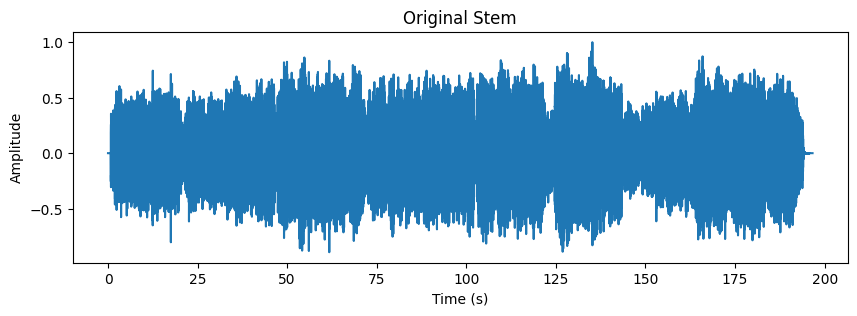

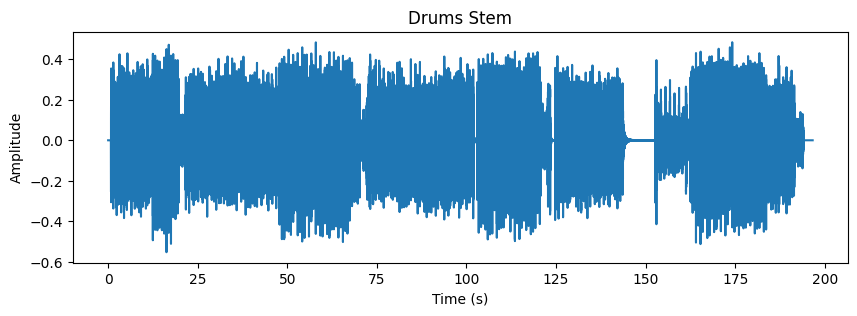

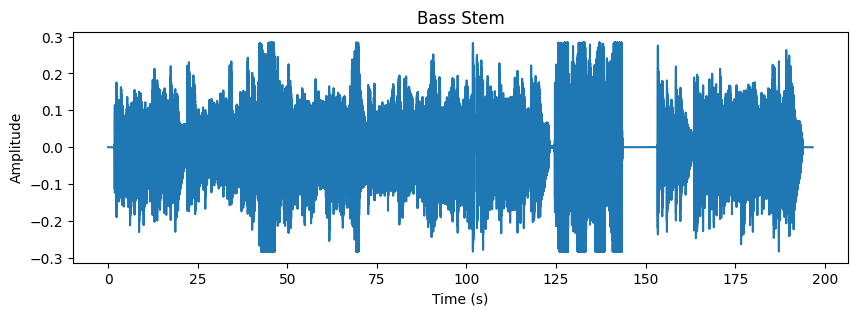

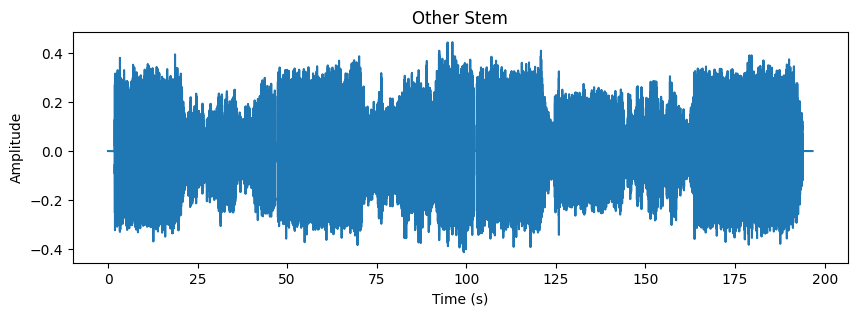

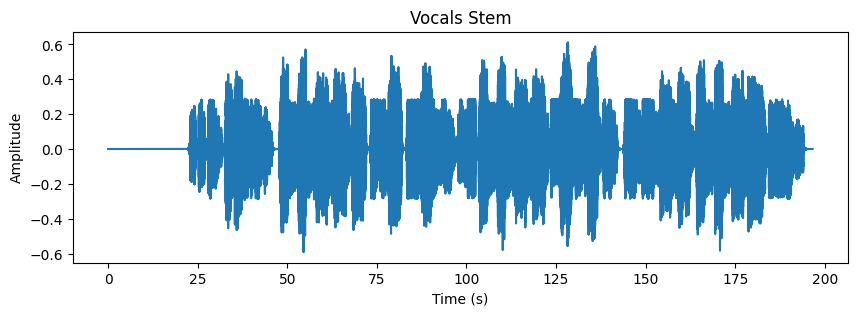

In [24]:
def plot_stems(file_path, stem_names=None, figsize=(10, 3), sr=None):
    """
    Plots the stems from a given Native Instruments stem format (.mp4) file.

    Parameters:
    file_path (str): Path to the stem file.
    stem_names (list of str): Names of the stems for labeling.
    figsize (tuple): Size of each subplot.
    sr (int): Sampling rate for audio processing. If None, it uses the rate from the file.
    
    Returns:
    None
    """

    # Default stem names
    if stem_names is None:
        stem_names = ['Mixture', 'Drums', 'Bass', 'Other', 'Vocals']

    try:
        # Read the stems using stempeg
        stems, rate = stempeg.read_stems(file_path, sample_rate=sr)

        # Plot each stem
        for i, (stem, name) in enumerate(zip(stems, stem_names)):
            plt.figure(figsize=figsize)
            plt.plot(np.linspace(0, len(stem.T[0]) / rate, len(stem.T[0])), stem.T[0])
            plt.title(f'{name} Stem')
            plt.xlabel('Time (s)')
            plt.ylabel('Amplitude')
            plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

# Plot example song
plot_stems("../data/raw/train/Actions - Devil's Words.stem.mp4")
